In [1]:
from factory import Factory
from plotting import plot_factory
from time import time

import primitives as P

In [2]:
f = Factory()
m1 = f.new_machine(color='b')
pl = f.new_production_line(num_machines=4, machine_size=3, num_inputs=1, color='g')
m3 = f.new_machine(color='r')

#
f.connect_with_inserter(m1, pl.input(0))
#f.connect_with_inserter(m3, pl.input(0))
f.connect_with_inserter(pl.output(), m3)

In [2]:
def measure_time():
    f = Factory()
    m1 = f.new_machine(color='b')
    pl = f.new_production_line(num_machines=100, machine_size=3, num_inputs=1, color='g')
    m3 = f.new_machine(color='r')

    #
    f.connect_with_inserter(m1, pl.input(0))
    #f.connect_with_inserter(m3, pl.input(0))
    f.connect_with_inserter(pl.output(), m3)

    model = f.finalize_and_model()
    assert model is not None
    return f.elapsed_time

times100 = []
#for k in range(100):
#    times100.append(measure_time())
#    print('.', end='', flush=True)

....................................................................................................

In [3]:
import matplotlib.pyplot as plt

(array([11., 31., 23., 20.,  8.,  4.,  1.,  0.,  1.,  1.]),
 array([0.01777577, 0.01853511, 0.01929445, 0.02005379, 0.02081313,
        0.02157247, 0.02233181, 0.02309115, 0.02385049, 0.02460983,
        0.02536917]),
 <a list of 10 Patch objects>)

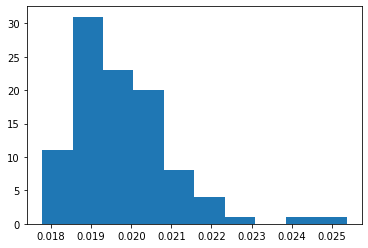

In [21]:
plt.hist(times)

(array([ 6., 12., 16., 27., 15.,  8.,  7.,  4.,  2.,  3.]),
 array([0.02119637, 0.02177544, 0.02235451, 0.02293358, 0.02351265,
        0.02409172, 0.02467079, 0.02524986, 0.02582893, 0.026408  ,
        0.02698708]),
 <a list of 10 Patch objects>)

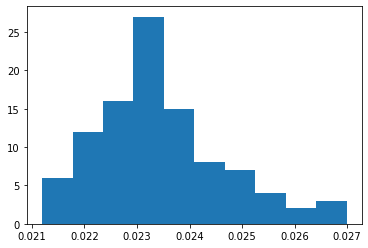

In [6]:
plt.hist(times)

(array([ 5., 18., 33., 16., 14.,  5.,  7.,  1.,  0.,  1.]),
 array([0.01783729, 0.01850667, 0.01917605, 0.01984544, 0.02051482,
        0.02118421, 0.02185359, 0.02252297, 0.02319236, 0.02386174,
        0.02453113]),
 <a list of 10 Patch objects>)

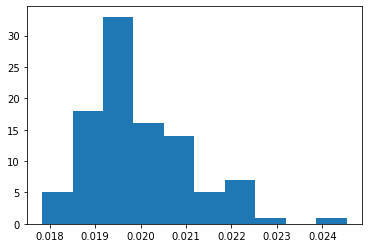

In [5]:
plt.hist(times100)

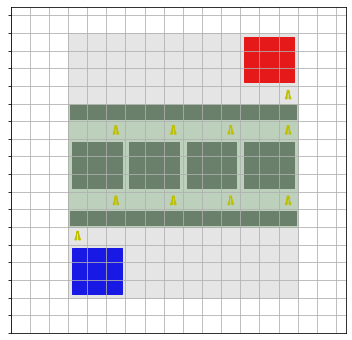

In [3]:
model = f.finalize_and_model()
plot_factory(f, size=(6,6))

# Composing large processing lines

In [1]:
from factory import Factory
from plotting import plot_factory
from time import time

import primitives as P

In [25]:
S1 = 6
S2 = 4
S3 = S2
f = Factory()
p1 = f.new_production_line(num_machines=S1, machine_size=2, num_inputs=0, auto_output=True, color='b')
p2 = f.new_production_line(num_machines=S2, machine_size=3, num_inputs=1, color='g')
p3 = f.new_production_line(num_machines=S3, machine_size=3, num_inputs=1, color='r')

f.connect_with_inserter(p1.output(), p2.input(0))
f.connect_with_inserter(p2.output(), p3.input(0))

#f.connect_with_inserter(m3, pl.input(0))


LBU 0 None None
1
V= 53
LBU 0 26 53
-1
LBU 27 40 53
1
V= 40
LBU 27 33 40
-1
LBU 34 37 40
1
V= 37
LBU 34 35 37
-1
LBU 36 36 37
1
V= 36


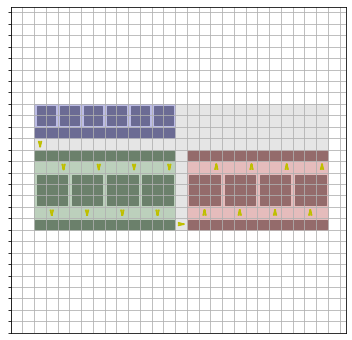

In [26]:
metric = f.area.size.x + f.area.size.y
model = f.finalize_and_model(minimize_metric=metric)
plot_factory(f, size=(6,6))

In [20]:
p1.output().eval()

Point2D(0,10)

In [13]:
p1.area.pos.eval()

Point2D(1,0)

In [22]:
S1 = 15
S2 = 10
S3 = S2
f = Factory()
p1 = f.new_production_line(num_machines=S1, machine_size=2, num_inputs=0, auto_output=True, color='b')
p2 = f.new_production_line(num_machines=S2, machine_size=3, num_inputs=1, color='g')
p3 = f.new_production_line(num_machines=S3, machine_size=3, num_inputs=1, color='r')

f.connect_with_inserter(p1.output(), p2.input(0))
f.connect_with_inserter(p2.output(), p3.input(0))

LBU 0 None None
1
V= 49
LBU 0 24 49
-1
LBU 25 37 49
-1
LBU 38 43 49
-1
LBU 44 46 49
-1
LBU 47 48 49
-1


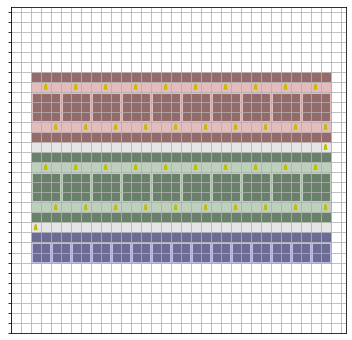

In [23]:
metric = f.area.size.x + f.area.size.y
model = f.finalize_and_model(minimize_metric=metric)
plot_factory(f, size=(6,6))

In [2]:
S1 = 6
S2 = 4
S3 = S2
f = Factory()
r1 = f.new_production_line(num_machines=S1, machine_size=2, num_inputs=0, auto_output=True, color='b')
r2 = f.new_production_line(num_machines=S1, machine_size=2, num_inputs=0, auto_output=True, color='g')
p1 = f.new_production_line(num_machines=S2, machine_size=3, num_inputs=2, color='y')
p2 = f.new_production_line(num_machines=S2, machine_size=3, num_inputs=1, color='r')
#p3 = f.new_production_line(num_machines=S3, machine_size=3, num_inputs=1, color='r')

f.connect_with_inserter(r1.output(), p1.input(0))
f.connect_with_inserter(r2.output(), p1.input(1))
f.connect_with_inserter(p1.output(), p2.input(0))

LBU 0 None None
1
V= 45
LBU 0 22 45
-1
LBU 23 34 45
-1
LBU 35 40 45
1
V= 40
LBU 35 37 40
1
V= 37
LBU 35 36 37
-1


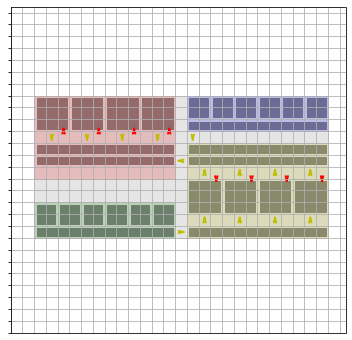

In [3]:
metric = f.area.size.x + f.area.size.y
model = f.finalize_and_model(minimize_metric=metric)
#model = f.finalize_and_model()
plot_factory(f, size=(6,6))

In [50]:
p1.output().eval(), p2.input(0).eval()

(Point2D(0,2), Point2D(0,4))

In [40]:
p2.output().eval()

Point2D(11,10)

In [43]:
p3.input(0).eval()

Point2D(0,12)